In [1]:
#importing the required modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [2]:
home_dir = os.path.join(r'Z:/balint/numt/Michael/data/')

In [3]:
numts_array=pd.read_csv(home_dir+'numt_master_array.csv')
numts_array.head()

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,g_up_flanking,g_down_flanking,"mt_up_flanking (if strand is negative, the coordinates are corrected)","mt_down_flanking (if strand is negative, the coordinates are corrected)",ensembl_gene_id,ensembl_description
0,17245,0.0,0.0,MT,0,0,17245,17245,+,+,17245,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,NaN,NaN,TACAAATTGTATAATATTTGGACTAAACCCCCTTTCCCACCCCAAG...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,ENSOCUG00000029081,NaN
1,3398,0.0,0.0,1,114731432,6976,4680,4681,+,+,194850757,taGTAAAATTATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,TAGTAAAACCATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,ACAAAAGACTCTGAATAGCCAAAGCGATCCTGAACAAGAAAAATCA...,TATATATATTTATATATATATGTATATATGTACATATATATAACTA...,CCTTCGCCTCAAAACGAGAAGTAGAGACTATTGAACTAACAACCAC...,AACTGCTAATTCATGCTCCCATGTCTAACCCCATGGCTTTCTCAAC...,ENSOCUG00000006104,cilia and flagella associated protein 300 [Sou...
2,3120,0.0,0.0,GL019308,67160,883,4892,4945,+,+,88228,CAAGGCCATGAAGCATGCACACACTGCCCATCGCTCTCCTCAAACA...,CAAGGCCATGAAGCACGCACACACCGCCCGTCACCCTCCTCAAGTG...,GATAAACCCCGATAAACTTTACCACTCTTTGCCAACTCAGCCTCTA...,ATGAAGGGGCAAAGAGTAATTTTACAGTCGAGAGGGCTAGCAGTCA...,TACCGCCATCTTCAGCGAACCCTAAAAAGGAGCAAAAGTAAGCTCA...,TAGGGGCTATTAACTTTATTACAACTATTATTAATATGAAAGCCCC...,ENSOCUG00000031196,NaN
3,1888,0.0,0.0,GL019308,62527,12805,3439,3462,+,+,88228,AATTATTCATAGCCTCAATGATGAACAAGACATCCAAAAAACAGGA...,AATTATTCACAGCCTcaaTGATGAACAGGATATCCGAAAGATAGGC...,GTAGGAATTATATCCTTCCTCCTCATCGGCTGATGGCATGGCCAAG...,ACGTATACATGAGTTGTTCTTACATAATTGAATATACCTGCAATGC...,TGCCTAGGCGCAATCACTACCTTATTCACAGCCCTATGTGCCCTCA...,GTACACCCGTACGCACGCACGTACACCCGTACGCACGCACGTACAC...,ENSOCUG00000037635,NaN
4,1824,0.0,0.0,AAGW02081594,14016,6061,3040,3073,+,+,24576,TTCTTTGGACACCCTGAGGTATATATTCTTATCCTTCCAGGATTCG...,TTTTTCGGGCACCCCGAAGTATATATTCTTATTCTTCCAGGATTTG...,GACATGTCAAAGGAACGCAGAAGCCAGCTTGAAAAAGTCCTCAACA...,TGAAATAGCTATCACTATTCAGGTATGCCACTATTCTTCTAGGCAT...,ATATGAAAGCCCCTGCAATATCTCAATATCAAACCCCCTTATTCGT...,ATTCTCCTAGGTATCTATTTTACCCTACTTCAAGCATCGGAGTATT...,NaN,NaN


In [4]:
#defining a function for calculating identity
def identity(g_sequence):
    seq_index=g_sequences[g_sequences==g_sequence].index[0]
    g_sequence=g_sequence.upper()
    mt_sequence=mt_sequences[seq_index].upper()
    identical_residues=0
    for res_index, g_residue in enumerate(g_sequence):
        mt_residue=mt_sequence[res_index]
        if g_residue==mt_residue:
            identical_residues+=1
    identity=(identical_residues/len(g_sequence))*100
    return identity

In [84]:
g_sequences=numts_array['g_sequence']

In [6]:
mt_sequences=numts_array['mt_sequence']

In [153]:
g_ids=numts_array['g_id']
g_ids.index=g_ids

In [168]:
chr_id_mask=g_ids.str.len()<3
chr_ids=g_ids[chr_id_mask]

In [169]:
scaffold_id_mask=g_ids.str.len()>3
scaffold_ids=g_ids[scaffold_id_mask]

In [165]:
identities=g_sequences.apply(identity)
identities.index=g_ids
df=pd.DataFrame(identities)
df

,g_sequence
g_id,
MT,100.000000
1,86.653854
GL019308,83.558877
GL019308,79.608295
AAGW02081594,80.766732
...,...
GL019047,67.611336
AAGW02081404,80.000000
GL019311,71.052632


In [166]:
lengths=g_sequences.apply(lambda seq:len(seq))
lengths.index=g_ids
df['lengths']=lengths
df.columns=['identity','length']
df

,identity,length
g_id,,
MT,100.000000,17245
1,86.653854,4683
GL019308,83.558877,4951
GL019308,79.608295,3472
AAGW02081594,80.766732,3078
...,...,...
GL019047,67.611336,247
AAGW02081404,80.000000,140
GL019311,71.052632,228


In [174]:
scaffolds=df[df.index.isin(scaffold_ids)]
scaffolds

,identity,length
g_id,,
GL019308,83.558877,4951
GL019308,79.608295,3472
AAGW02081594,80.766732,3078
AAGW02081594,79.815359,2383
GL019326,80.320000,1875
...,...,...
AAGW02081404,78.481013,158
GL019047,67.611336,247
AAGW02081404,80.000000,140


In [175]:
chrs=df[df.index.isin(chr_ids)]
chrs

,identity,length
g_id,,
MT,100.000000,17245
1,86.653854,4683
18,69.132482,1487
9,75.983718,737
12,90.023753,421
17,71.356784,597
1,69.595537,717
9,67.303103,838
1,65.280464,1034


Text(0.5, 0, 'Sequence length (bp)')

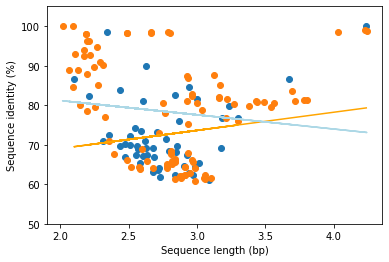

In [190]:
chrs_log10=chrs['length'].apply(lambda value:np.log10(value))
scaffolds_log10=scaffolds['length'].apply(lambda value:np.log10(value))
plt.scatter(chrs_log10, chrs['identity'])
plt.ylim(50,105)
m, b = np.polyfit(chrs_log10, chrs['identity'], 1)
plt.plot(chrs_log10, m*chrs_log10 + b, 'orange')

plt.scatter(scaffolds_log10, scaffolds['identity'])
plt.ylim(50,105)
m, b = np.polyfit(scaffolds_log10, scaffolds['identity'], 1)
plt.plot(scaffolds_log10, m*scaffolds_log10 + b, 'lightblue')

plt.ylabel('Sequence identity (%)')
plt.xlabel('Sequence length (bp)')

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0.5, 0, 'Sequence length (bp)')

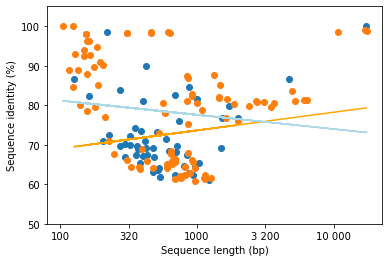

In [193]:
fig,ax=plt.subplots(1,1)
ax.set_xticklabels(['0','100','320','1000','3 200','10 000'])
chrs_log10=chrs['length'].apply(lambda value:np.log10(value))
scaffolds_log10=scaffolds['length'].apply(lambda value:np.log10(value))
ax.scatter(chrs_log10, chrs['identity'])
plt.ylim(50,105)
m, b = np.polyfit(chrs_log10, chrs['identity'], 1)
plt.plot(chrs_log10, m*chrs_log10 + b, 'orange')

ax.scatter(scaffolds_log10, scaffolds['identity'])
plt.ylim(50,105)
m, b = np.polyfit(scaffolds_log10, scaffolds['identity'], 1)
plt.plot(scaffolds_log10, m*scaffolds_log10 + b, 'lightblue')

plt.ylabel('Sequence identity (%)')
plt.xlabel('Sequence length (bp)')

In [9]:
log10_scale=pd.Series(identities.index).apply(lambda value:np.log10(value))

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


(50.0, 105.0)

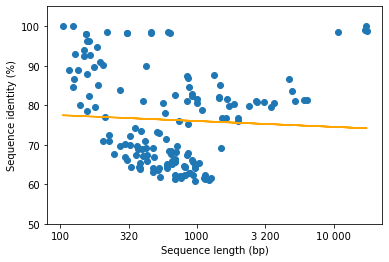

In [58]:
fig,ax=plt.subplots(1,1)
ax.set_xticklabels(['0','100','320','1000','3 200','10 000'])
ax.scatter(log10_scale, identities)
m, b = np.polyfit(log10_scale, identities, 1)
plt.plot(log10_scale, m*log10_scale + b, 'orange')
plt.ylabel('Sequence identity (%)')
plt.xlabel('Sequence length (bp)')
plt.ylim(50,105)